<a href="https://colab.research.google.com/github/adityakuncara/Semester5-MachineLearning/blob/main/Praktikum%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [2]:
import pandas as pd


In [3]:
data = 'Titanic-Dataset.csv' # path dataset
df = pd.read_csv(data) # load dataset

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset-fixed.csv to Titanic-Dataset-fixed (1).csv


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
dpath = 'Titanic-Dataset-fixed.csv'
df = pd.read_csv(dpath)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


In [11]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,DECK
1,1,1,38.0,female,C85
2,1,3,26.0,female,DECK
3,1,1,35.0,female,C123
4,0,3,35.0,male,DECK


In [12]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding

In [13]:
std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

In [14]:
df = pd.read_csv('Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [15]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
0    549
1    342
Name: Survived, dtype: int64
Jumlah label data train:
0    439
1    273
Name: Survived, dtype: int64
Jumlah label data val:
0    53
1    36
Name: Survived, dtype: int64
Jumlah label data test:
0    57
1    33
Name: Survived, dtype: int64


In [16]:
df2 = pd.read_csv('Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [17]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
0    549
1    342
Name: Survived, dtype: int64
Jumlah label data train:
0    439
1    273
Name: Survived, dtype: int64
Jumlah label data val:
0    51
1    38
Name: Survived, dtype: int64
Jumlah label data test:
0    59
1    31
Name: Survived, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split

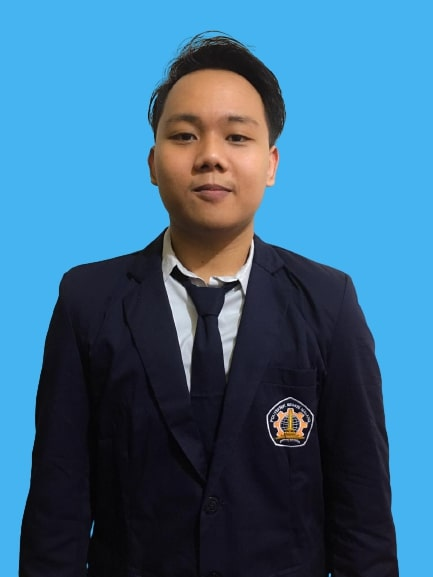

In [20]:
from PIL import Image

img = Image.open('/content/adit.jpg')
display(img) # tampilkan gambar

In [21]:
# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# Cetak fitur histogram pada channel red
print(r.histogram())

256
[426, 53, 51, 68, 183, 666, 1433, 2172, 2285, 2057, 2022, 2622, 3065, 4045, 4935, 5171, 4630, 5220, 5932, 6577, 5293, 4348, 3920, 3392, 3275, 3115, 2580, 2414, 2497, 2801, 2582, 2570, 1648, 1370, 1169, 1166, 1235, 1028, 1186, 872, 794, 633, 522, 460, 377, 349, 333, 288, 251, 244, 231, 211, 201, 261, 217, 204, 195, 178, 193, 188, 160, 198, 172, 158, 185, 265, 399, 711, 1916, 542, 106263, 2312, 461, 892, 480, 333, 240, 254, 224, 212, 230, 218, 212, 199, 231, 198, 199, 228, 231, 241, 225, 205, 220, 202, 225, 181, 189, 168, 157, 151, 128, 121, 118, 109, 118, 109, 102, 99, 104, 112, 101, 108, 97, 110, 115, 105, 105, 139, 109, 115, 154, 128, 122, 104, 101, 98, 105, 99, 76, 78, 95, 93, 97, 78, 100, 104, 90, 78, 100, 92, 86, 97, 77, 94, 110, 79, 93, 105, 109, 91, 114, 130, 116, 123, 114, 92, 121, 121, 122, 114, 127, 126, 131, 150, 118, 143, 131, 158, 150, 151, 159, 148, 147, 158, 172, 165, 151, 144, 138, 167, 161, 145, 172, 172, 179, 197, 196, 204, 209, 222, 246, 239, 255, 265, 295, 292, 3

In [22]:
from google.colab import files
uploaded = files.upload()

Saving wbc.csv to wbc.csv


In [23]:
data = 'wbc.csv' # path dataset
df = pd.read_csv(data) # load dataset

In [24]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
from google.colab import files
uploaded = files.upload()

Saving wbc.csv to wbc (1).csv


In [28]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

In [29]:
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


##2. Lakukan proses encoding pada kolom "diagnosis".

In [30]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


##3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.

In [31]:
std = StandardScaler()
df['radius_mean'] = std.fit_transform(df[['radius_mean']])
df['texture_mean'] = std.fit_transform(df[['texture_mean']])
df['perimeter_mean'] = std.fit_transform(df[['perimeter_mean']])
df['area_mean'] = std.fit_transform(df[['area_mean']])
df['smoothness_mean'] = std.fit_transform(df[['smoothness_mean']])
df['compactness_mean'] = std.fit_transform(df[['compactness_mean']])
df['concavity_mean'] = std.fit_transform(df[['concavity_mean']])
df['concave points_mean'] = std.fit_transform(df[['concave points_mean']])
df['symmetry_mean'] = std.fit_transform(df[['symmetry_mean']])
df['fractal_dimension_mean'] = std.fit_transform(df[['fractal_dimension_mean']])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


##4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

In [32]:
# split data traininig dan lainnya
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0, stratify=df['diagnosis'])

# split validasi & testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0, stratify=df_unseen['diagnosis'])

print(f'Jumlah label data asli:\n{df.diagnosis.value_counts()}')
print(f'Jumlah label data train:\n{df_train.diagnosis.value_counts()}')
print(f'Jumlah label data val:\n{df_val.diagnosis.value_counts()}')
print(f'Jumlah label data test:\n{df_test.diagnosis.value_counts()}')


Jumlah label data asli:
0    357
1    212
Name: diagnosis, dtype: int64
Jumlah label data train:
0    285
1    170
Name: diagnosis, dtype: int64
Jumlah label data val:
0    36
1    21
Name: diagnosis, dtype: int64
Jumlah label data test:
0    36
1    21
Name: diagnosis, dtype: int64
